In [1]:
## This notebook describes how to generate the scanning strategy of our experiment:
## * Defining the site of observation on earth for which we will make the observations.
## * Defining the region(s) of the sky to observe.
## * Defining the schedule of observations.

In [2]:
## Include the path to instrument
import sys
import os
sys.path.insert(0,os.path.realpath(os.path.join(os.getcwd(),'..')))

## See http://simonsobservatory.wikidot.com/instrument-systmodule for more informations.
from s4cmb.scanning_strategy import ScanningStrategy
import numpy as np

## Our scanning strategy will consist in scanning the Southern sky from Chile.
## We will perform 12 deep scans (CES) of roughly 4h, one per day.
## We will start the observation January, 1st 2013.
## We will set the sampling frequency of the detector to be 8 Hz, and we will 
## scan the sky at a speed of 0.4 deg/s.
scan = ScanningStrategy(nCES=12, start_date='2013/1/1 00:00:00',
                        telescope_longitude='-67:46.816',
                        telescope_latitude='-22:56.396', telescope_elevation=5200.,
                        name_strategy='deep_patch', sampling_freq=8., sky_speed=0.4,
                        language='python')

## Note that only one scanning strategy is pre-loaded in the code (name_strategy='deep_patch').
## This default scanning strategy corresponds to a small patch (fsky ~ 5%) in the Southern sky.
## For a custom strategy (advanced users), modify the routine define_boundary_of_scan, or bug me!

In [3]:
## Let's run the scan!
scan.run(silent=False)

+-----------------------------------+
 CES starts at 20130101_145310 and finishes at 20130101_194508
 It lasts 4.866 hours
+-----------------------------------+
+-----------------------------------+
 CES starts at 20130102_194053 and finishes at 20130102_234112
 It lasts 4.006 hours
+-----------------------------------+
+-----------------------------------+
 CES starts at 20130103_193657 and finishes at 20130103_233716
 It lasts 4.006 hours
+-----------------------------------+
+-----------------------------------+
 CES starts at 20130104_193302 and finishes at 20130104_233321
 It lasts 4.006 hours
+-----------------------------------+
+-----------------------------------+
 CES starts at 20130105_192906 and finishes at 20130105_232925
 It lasts 4.006 hours
+-----------------------------------+
+-----------------------------------+
 CES starts at 20130106_192510 and finishes at 20130106_232529
 It lasts 4.006 hours
+-----------------------------------+
+---------------------------------

In [4]:
## You probably noticed that it was quite long to run the scans despite the 
## low sampling frequency (real case can have a sampling frequency frequency of O(100) Hz).
## If you need speed up, you can change the language for the core computations, 
## by setting language='C' or language='fortran' when you create an instance of scanning_strategy.
## Note that C codes are compiled on-the-fly (weave), but for fortran codes you need
## first to compile it. See the setup.py or the provided Makefile.

In [5]:
## You can access the parameters for each scan directly
scan.scan0, scan.scan1

({'CES': 0,
  'Dec': array([ 0.        , -1.00281812, -1.00368897, ..., -0.99222918,
         -0.99310055, -0.99397189]),
  'RA': array([ 0.        ,  5.69966562,  5.69956417, ...,  0.6958662 ,
          0.69578204,  0.69569683]),
  'azimuth': array([ 2.5172238 ,  2.51823147,  2.51923914, ...,  2.50613947,
          2.50714714,  2.50815481]),
  'clock-utc': array([ 56293.62037037,  56293.62037182,  56293.62037326, ...,
          56293.82290067,  56293.82290212,  56293.82290357]),
  'elevation': array([ 0.52359878,  0.52359878,  0.52359878, ...,  0.52359878,
          0.52359878,  0.52359878]),
  'firstmjd': 56293.620254629634,
  'lastmjd': 56293.823019306597,
  'nCES': 12,
  'nts': 139992,
  'sample_rate': 8.0,
  'sky_speed': 0.4},
 {'CES': 1,
  'Dec': array([ 0.        , -1.17798691, -1.17798709, ..., -1.17222149,
         -1.17204926, -1.17187453]),
  'RA': array([ 0.        ,  5.75928832,  5.7570171 , ...,  0.37562509,
          0.37342982,  0.37123675]),
  'azimuth': array([ 3.1390

Stats: nhits = 11480/196608 (fsky=5.84%), max hit = 2451655
38.0877367699 141.91226323 -51.9122632301 51.9122632301
The interval between parallels is 10 deg 0.00'.
The interval between meridians is 6 deg 0.00'.


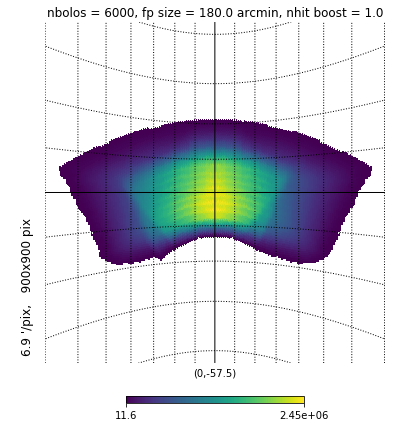

In [8]:
## For visualisation, you can also project the data onto sky. Note that this option is not yet available
## if you are interfacing with C or fortran for speed-up (because RA and Dec are not computed). It is meant to
## be used for debugging and quickly testing scanning strategy (i.e. small instrument).
## Note also that the scanning strategy module computes the scan parameters for one reference 
## detectors (the pointing for all detectors in the focal plane is done later while processing TOD). 
## Therefore for better visualisation, we provide a trick to simulate as if you had a full focal plane based
## on the reference detector parameters ("focal plane convolution", nicely provided by Neil G.W.).
scan.visualize_my_scan(nside=128, test=False)

In [9]:
## If you have trouble with the weave package, re-run the previous cell several times 
## (3 should be enough to get the map).

In [10]:
## Et voilà, you are ready to simulate Time-Ordered Data now!